In [65]:
from flaregress.io import DatabaseHandler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [20]:
# Load database from h5 file
db = DatabaseHandler()
db.load('./trial_data/db.h5')

In [46]:
# Model hyperparameters
p = 5; d = 1; q = 0
split_fraction = 0.8

In [47]:
# Process data for ARIMA
split = int(len(db.entries) * split_fraction)
training_stream = [x['f107'].values[0] for x in db.entries[:split]]
test_stream = [x['f107'].values[0] for x in db.entries[split:]]

In [48]:
# Train model
model = ARIMA(training_stream, order=(p, d, q))
model = model.fit(disp=0)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                47124
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -386964.134
Method:                       css-mle   S.D. of innovations            891.294
Date:                Mon, 10 Dec 2018   AIC                         773942.267
Time:                        10:59:19   BIC                         774003.591
Sample:                             1   HQIC                        773961.530
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      3.080   7.23e-05      1.000      -6.036       6.037
ar.L1.D.y   2.858e-07      0.005    6.2e-05      1.000      -0.009       0.009
ar.L2.D.y     -0.2665      0.005    -57.980      0.0

In [63]:
# Test model
# First 100 rows from the test stream are selected due to runtime issues
n = len(test_stream); limit = 100
history = training_stream[:]
predictions = []
for i in range(limit):
    model = ARIMA(history, order=(p, d, q))
    model = model.fit(disp=0)
    yhat = model.forecast()[0]
    predictions.append(yhat)
    history.append(test_stream[i])
print('Test MSE error:', mean_squared_error(test_stream[:limit], predictions))

Test MSE error: 2.207122543711938


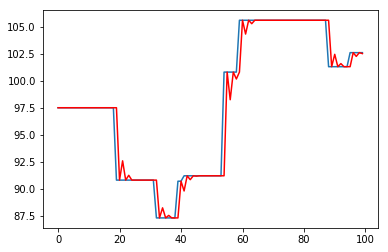

In [66]:
# Plot the results
plt.plot(test_stream[:limit])
plt.plot(predictions, color='red')
plt.show()